In [1]:
import pickle
import numpy as np

In [155]:
with open("feedback_debug/ppo_Swimmer-v5.pkl", "rb" ) as stuff:
    data = pickle.load(stuff)

In [156]:
data.keys()

dict_keys(['segments', 'ratings', 'preferences', 'demos', 'corrections', 'description', 'description_preference', 'opt_gaps'])

In [157]:
len(data["segments"])

959

In [158]:
import matplotlib.pyplot as plt

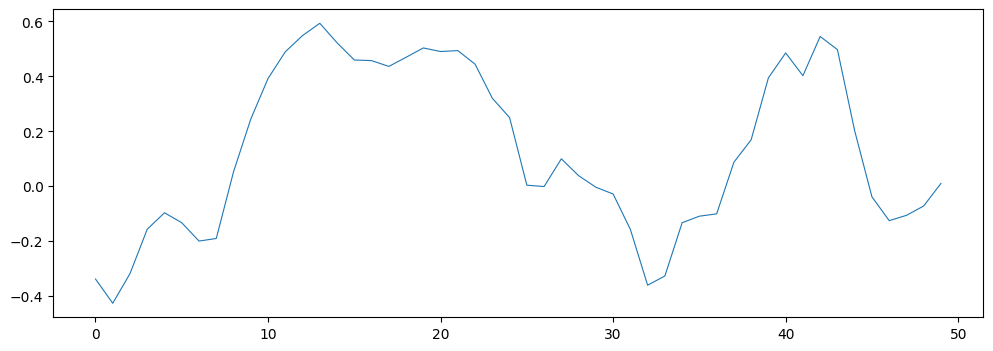

In [159]:
plt.figure(figsize=(12, 4))
plt.plot([d[2] for d in data["segments"][0]], linestyle='-', linewidth=0.8, label="Reward")

In [160]:
data["ratings"]

array([4, 1, 4, 4, 4, 4, 4, 0, 4, 3, 3, 1, 1, 2, 2, 3, 3, 4, 2, 2, 3, 3,
       2, 2, 4, 4, 4, 2, 3, 5, 5, 3, 2, 4, 2, 5, 5, 2, 2, 6, 2, 5, 2, 1,
       4, 1, 3, 4, 1, 2, 4, 5, 3, 4, 3, 2, 2, 1, 1, 4, 4, 2, 2, 2, 3, 3,
       5, 4, 5, 6, 6, 6, 3, 6, 3, 6, 3, 4, 2, 0, 0, 0, 3, 3, 3, 3, 3, 1,
       3, 3, 2, 0, 1, 2, 3, 1, 3, 2, 0, 5, 6, 3, 4, 2, 4, 7, 5, 5, 4, 5,
       4, 4, 4, 4, 3, 4, 4, 7, 0, 6, 6, 6, 3, 8, 2, 2, 2, 5, 7, 4, 7, 0,
       8, 3, 2, 2, 2, 2, 0, 0, 0, 5, 0, 7, 6, 0, 7, 0, 8, 6, 8, 4, 4, 7,
       5, 4, 5, 4, 2, 4, 1, 5, 3, 3, 0, 0, 0, 3, 0, 3, 4, 5, 3, 0, 0, 7,
       1, 2, 1, 8, 9, 3, 8, 5, 7, 8, 7, 8, 8, 4, 8, 6, 7, 5, 3, 2, 2, 6,
       1, 8, 2, 2, 5, 5, 2, 8, 9, 1, 5, 8, 2, 6, 5, 0, 0, 3, 5, 1, 3, 6,
       6, 8, 8, 9, 5, 1, 8, 5, 1, 2, 1, 4, 9, 6, 6, 2, 1, 3, 4, 1, 9, 9,
       8, 7, 6, 5, 3, 2, 1, 1, 1, 1, 1, 8, 9, 8, 5, 7, 6, 6, 1, 5, 3, 7,
       2, 8, 6, 6, 4, 4, 8, 3, 6, 3, 3, 4, 7, 5, 7, 6, 5, 8, 7, 6, 7, 8,
       4, 6, 6, 7, 4, 7, 5, 4, 8, 6, 4, 4, 2, 3, 7,

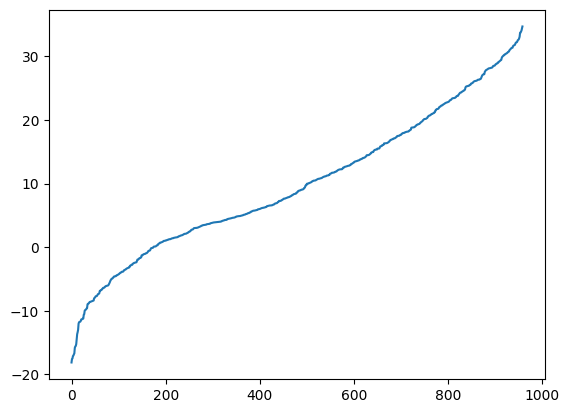

In [164]:
index = np.argsort([np.sum([e[2] for e in d]) for d in data["segments"]])
#index = np.arange(len(data["segments"]))
plt.plot(np.array([np.sum([e[2] for e in d]) for d in data["segments"]])[index])

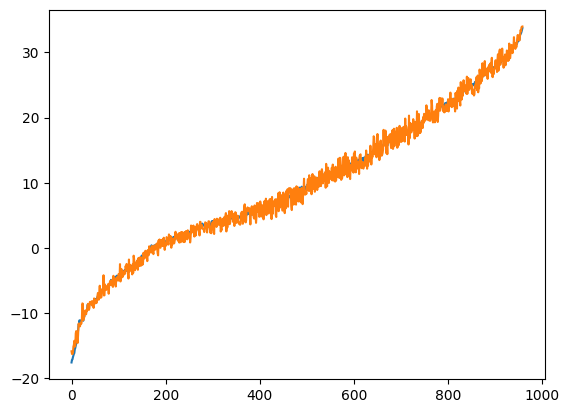

In [170]:
def discounted_sum_numpy(rewards, discount_factor):
    rewards = np.array(rewards)
    n = len(rewards)
    discount_factors = discount_factor ** np.arange(n)
    return np.sum(rewards * discount_factors)

plt.plot(np.array([discounted_sum_numpy([e[2] for e in d], 0.999) for d in data["segments"]])[index])
plt.plot(-np.array([d for d in data["opt_gaps"]])[index])

In [172]:
[e[2] for e in data["segments"][-1]]

[-0.00641856311343018,
 -0.16801269859870793,
 -0.3555566102212009,
 -0.4844766220694513,
 -0.5411466659659189,
 -0.5250502925729426,
 -0.46239334400132703,
 -0.37676533005823165,
 -0.2710905740748113,
 -0.1456538939643424,
 -0.0008910438596241519,
 0.16092268464285595,
 0.33541461051010435,
 0.5169159061267083,
 0.6995281417533197,
 0.8778393990723168,
 1.047149592119562,
 1.2033676290669706,
 1.3427886725920826,
 1.461906507083627,
 1.5575169189760154,
 1.6273884194018486,
 1.6710865880253558,
 1.6903700657900314,
 1.6886656524949086,
 1.6697934036049413,
 1.6062321772845853,
 1.4421983417033948,
 1.1482409523544046,
 0.7957538379392953,
 0.5203295389210236,
 0.36211120274275144,
 0.2622131661006142,
 0.06681876462369421,
 -0.21895832796049988,
 -0.529384787422275,
 -0.9158339967733167,
 -1.358613221866596,
 -1.8275083275787074,
 -2.202094876782945,
 -2.35873483228009,
 -2.3091054855723283,
 -2.0132761540065207,
 -1.5287554890885429,
 -1.402389169660062,
 -1.2090060921025254,
 -0.962

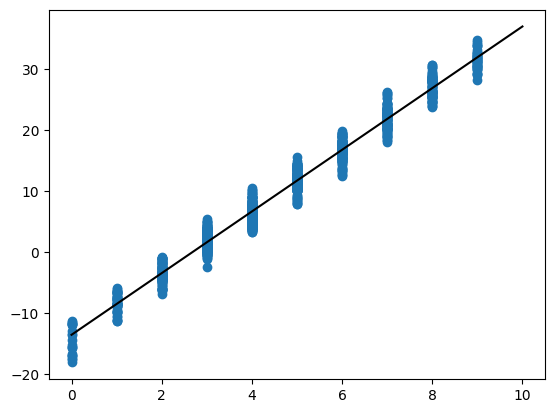

In [166]:
x = np.array([d for d in data["ratings"]])[index]
y = np.array([np.sum([e[2] for e in d]) for d in data["segments"]])[index]
plt.scatter(x, y)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 10, num=100)
# Plot regression line
plt.plot(xseq, a + b * xseq, color="k", lw=1.5)

0.0
0.0


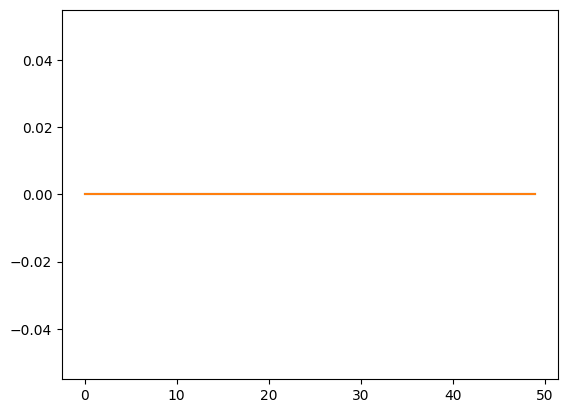

In [193]:
index = data["preferences"][-1][0]
index_2 = data["preferences"][-1][1]
plt.plot([e[2] for e in data["segments"][index]])
plt.plot([e[2] for e in data["segments"][index_2]])
print(np.sum([e[2] for e in data["segments"][index]]))
print(np.sum([e[2] for e in data["segments"][index_2]]))

In [194]:
data["segments"][index][0]

(array([[[[197, 209, 210],
          [197, 209, 210],
          [197, 209, 210],
          ...,
          [209, 156, 103],
          [213, 159, 102],
          [215, 160, 102]],
 
         [[187, 203, 204],
          [187, 203, 204],
          [177, 192, 193],
          ...,
          [222, 164,  97],
          [218, 161,  99],
          [213, 158, 101]],
 
         [[187, 203, 204],
          [187, 203, 204],
          [197, 209, 210],
          ...,
          [227, 168,  95],
          [227, 168,  95],
          [227, 167,  95]],
 
         ...,
 
         [[187, 203, 204],
          [187, 203, 204],
          [193, 206, 207],
          ...,
          [187, 203, 204],
          [197, 209, 210],
          [197, 209, 210]],
 
         [[177, 192, 193],
          [197, 209, 210],
          [177, 192, 193],
          ...,
          [177, 192, 193],
          [177, 192, 193],
          [177, 192, 193]],
 
         [[177, 192, 193],
          [177, 192, 193],
          [187, 203, 204],
   

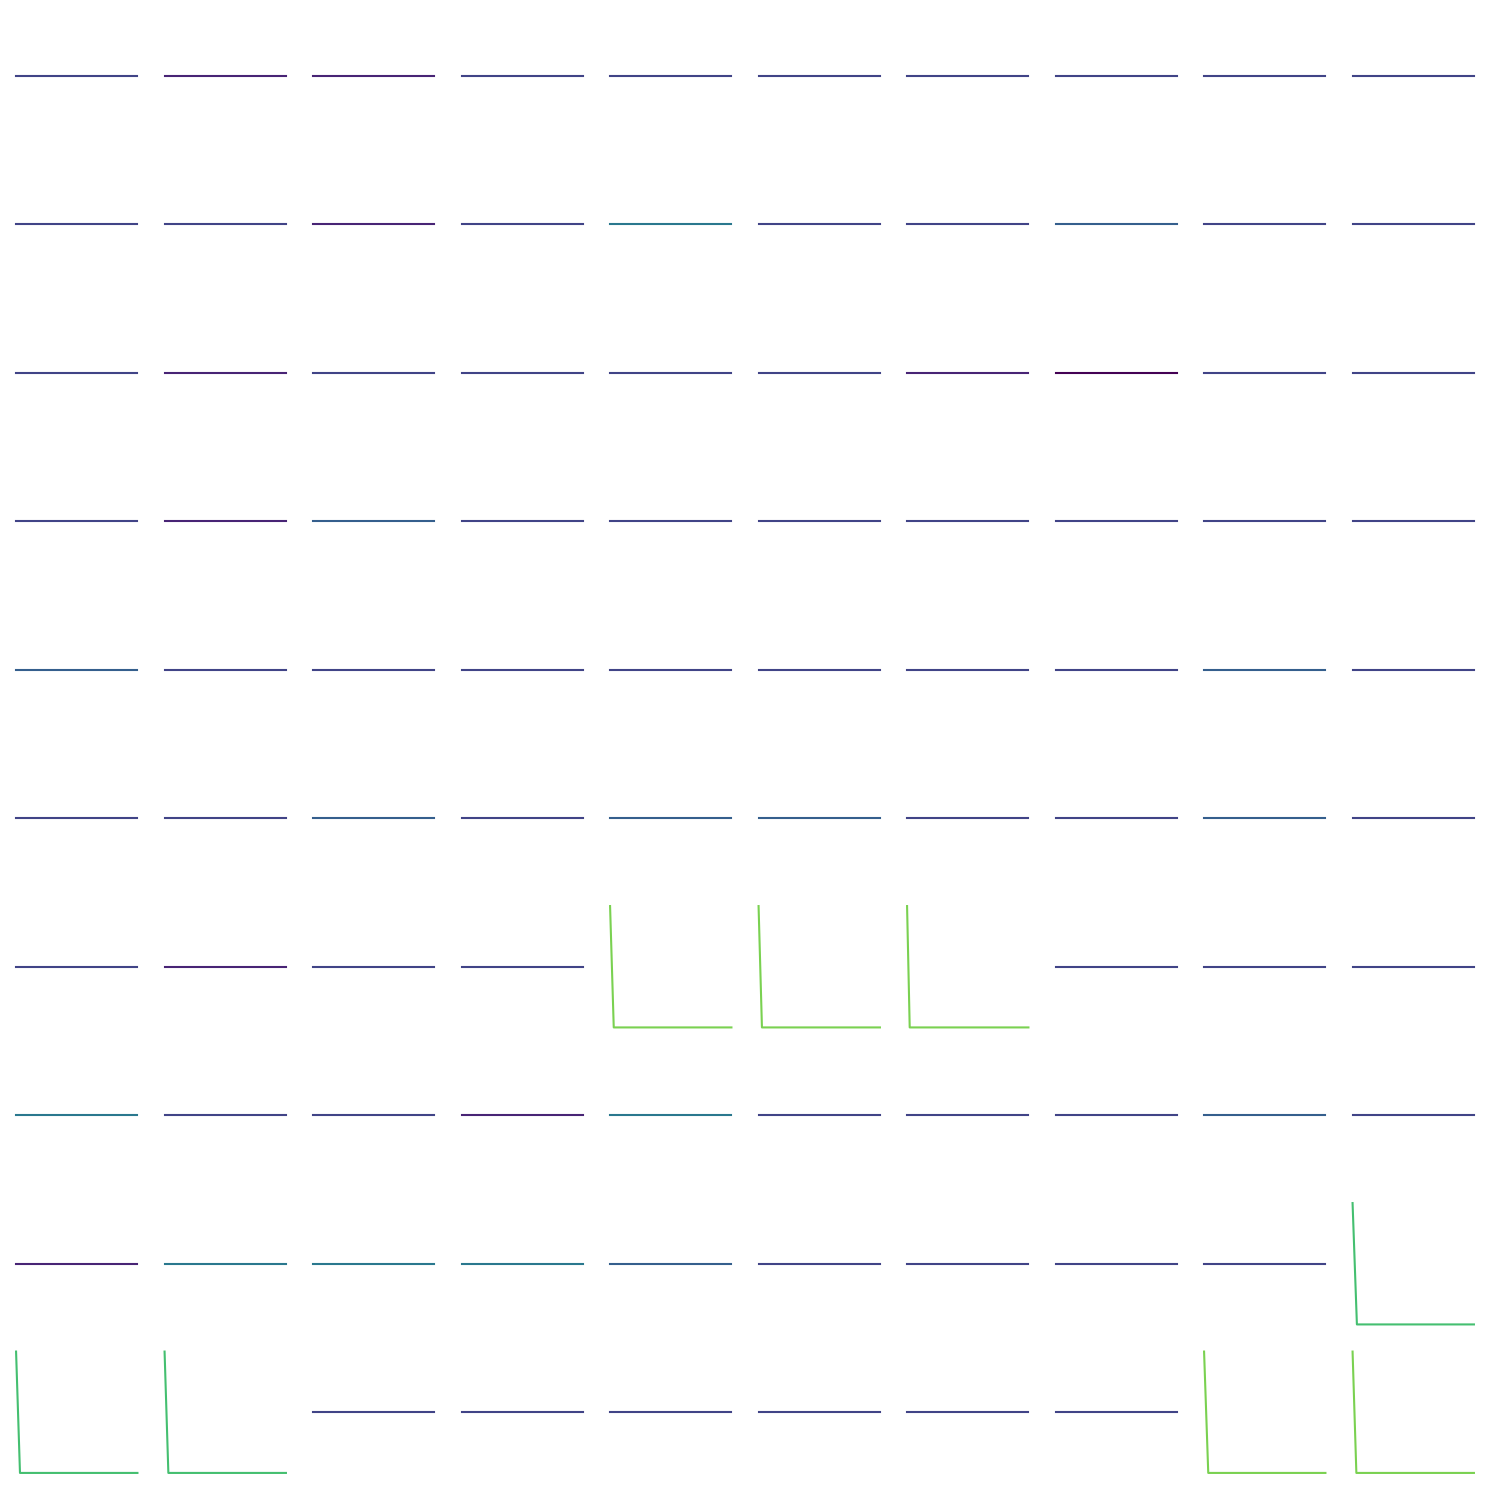

In [195]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid of subplots
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
cmap = plt.cm.viridis 
norm = plt.Normalize(0, 10)

# Plot each timeseries on its respective subplot
for i in range(10):
    for j in range(10):
        ax = axes[i, j]
        value = data["ratings"][i * 10 + j]
        color = cmap(norm(value))
        ax.plot([d[2] for d in data["segments"][i * 10 + j]], color=color[:3])
        ax.axis('off')  # Turn off axes for a cleaner look

plt.tight_layout()
plt.show()

In [196]:
import matplotlib.pyplot as plt
import numpy as np

(array([  2.,   0.,   0.,   3.,   2.,  19.,  79., 370., 160., 317.]),
 array([-2.07995289, -1.61217533, -1.14439777, -0.67662021, -0.20884265,
         0.25893492,  0.72671248,  1.19449004,  1.6622676 ,  2.13004516,
         2.59782272]),
 <BarContainer object of 10 artists>)

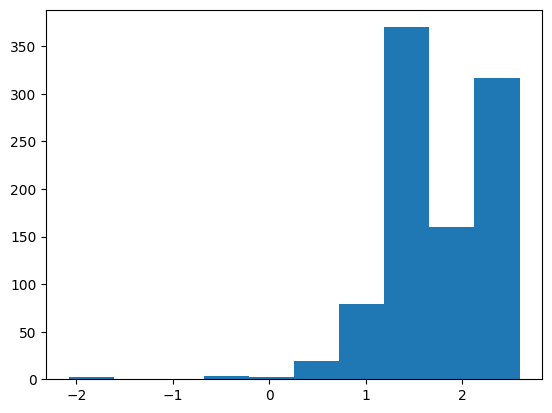

In [240]:
opt_gaps = data["opt_gaps"]
plt.hist(opt_gaps, bins=10)

In [16]:
def equal_depth_binning_with_indices(data, num_bins):
    # Sort the data and get the original indices
    sorted_indices = np.argsort(data)
    sorted_data = np.sort(data)
    
    # Determine the number of elements per bin
    bin_size = len(data) // num_bins
    remainder = len(data) % num_bins
    
    bins = []
    bin_indices = np.zeros(len(data), dtype=int)
    start = 0
    
    for i in range(num_bins):
        end = start + bin_size + (1 if i < remainder else 0)
        bin_indices[sorted_indices[start:end]] = i + 1
        bins.append(sorted_data[start:end])
        start = end
    
    return bin_indices, bins

max_rating = 10
ratings = max_rating - equal_depth_binning_with_indices(opt_gaps, max_rating)[0]

In [17]:
def equal_width_binning_with_indices(data, num_bins):
    data = np.array(data)
    # Find the minimum and maximum values in the data
    min_val, max_val = np.min(data), np.max(data)
    
    # Calculate the width of each bin
    bin_width = (max_val - min_val) / num_bins
    
    # Create bin edges
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    
    # Use numpy's digitize function to assign bin indices
    bin_indices = np.digitize(data, bin_edges[:-1])
    
    # Create the bins
    bins = [data[(bin_indices == i)] for i in range(1, num_bins + 1)]
    
    return bin_indices, bins

max_rating = 10
ratings2 = max_rating - equal_width_binning_with_indices(opt_gaps, max_rating)[0]

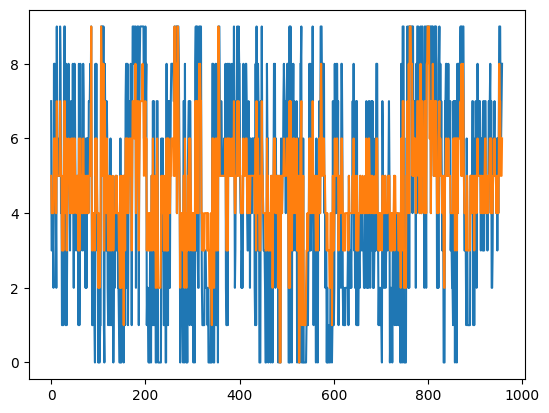

In [18]:
#plt.plot(opt_gaps)
plt.plot(ratings)
plt.plot(ratings2)

In [106]:
def discounted_sum_numpy(rewards, discount_factor):
    rewards = np.array(rewards)
    n = len(rewards)
    discount_factors = discount_factor ** np.arange(n)
    return np.sum(rewards * discount_factors)

segments = data["segments"]

for seg in segments:
    pass
    #print(discounted_sum_numpy([s[2] for s in seg], 0.98) - discounted_sum_numpy([s[2] for s in seg[:-1]], 0.98))

In [259]:
import pandas as pd

evals = np.load("../main/logs/ppo/Swimmer-v5_1/evaluations.npz")

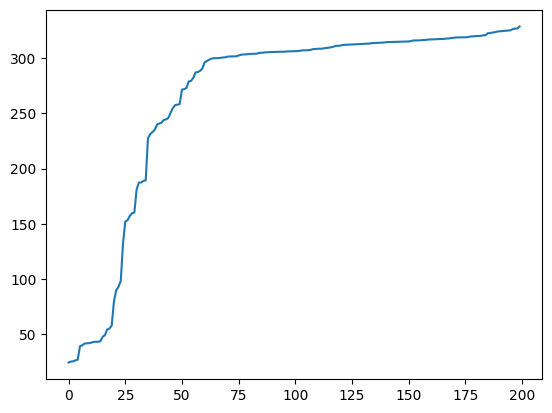

In [260]:
index = np.argsort(evals["results"].flatten())
plt.plot(evals["results"].flatten()[index])

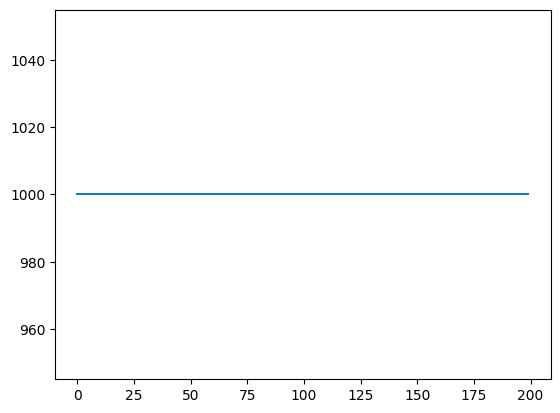

In [261]:
plt.plot(evals["ep_lengths"].flatten()[index])